# Project 1: Shark attacks
## Data analysis
### Objective
#### Study the areas of the world where there is a great risk of shark attack. 
* Which are the most common sharks in an area? 
* In which time of the year are more dangerous? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

### 1. Open the document
In the previous notebook "Cleaning_and_wrangling" a csv was generated containing all data cleaned.

In [2]:
attacks = pd.read_csv("OUTPUT/attacks_cleaned.csv")
attacks.head(4)

Year        Type    Country             Area  \
0  2018.0        Boat        USA       California   
1  2018.0  Unprovoked        USA          Georgia   
2  2018.0     Invalid        USA           Hawaii   
3  2018.0  Unprovoked  AUSTRALIA  New South Wales   

                         Location  Activity             Name Sex   \
0     Oceanside, San Diego County  Paddling      Julie Wolfe    F   
1  St. Simon Island, Glynn County  Standing  Adyson McNeely     F   
2                    Habush, Oahu   Surfing      John Denges    M   
3              Arrawarra Headland   Surfing             male    M   

             Age       Injury Fatal (Y/N)           Time       Species   \
0             57    No injury           N          18h00    White shark   
1             11  Some injury           N  14h00  -15h00  Not Available   
2             48  Some injury           N          07h45  Not Available   
3  Not Available  Some injury           N  Not Available     0-2m shark   

  Investigator or Source  original order   Date std.    Regions  
0             R. Collier          6303.0  2018.06.25        USA  
1                 Others          6302.0  2018.06.18        USA  
2                 Others          6301.0  2018.06.09        USA  
3               B. Myatt          6300.0  2018.06.08  AUSTRALIA

### 2. Higher-risk areas
Count number of attacks by region. "Other" includes the rest of countries not classified in this list.

In [3]:
attacks.Regions.value_counts()

USA                        2229
AUSTRALIA                  1640
Other                      1392
CARIBE AND MEXICAN GULF     320
SOUTH PACIFIC OCEAN         169
MEDITERRANEAN SEA           155
MADAGASCAR                  133
SOUTH EAST ASIA             132
JAPAN                        56
PERSIAN GULF                 52
INDIAN OCEAN                 24
Name: Regions, dtype: int64

### 3. Ranking the most common sharks in these regions
Plotting the species of shark related to the attacks of a specific region.

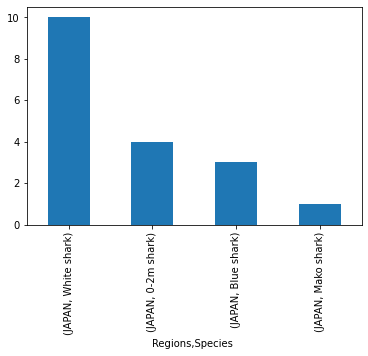

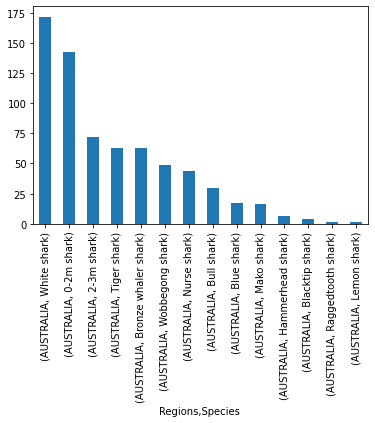

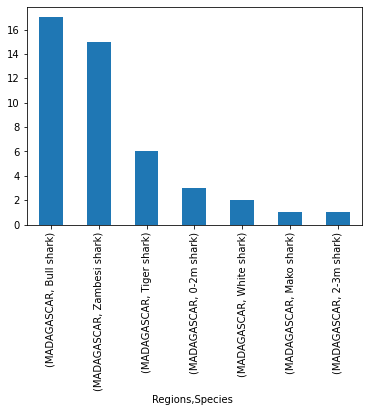

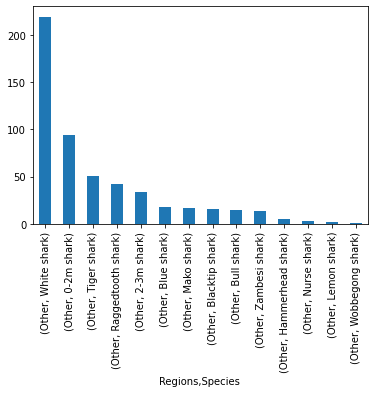

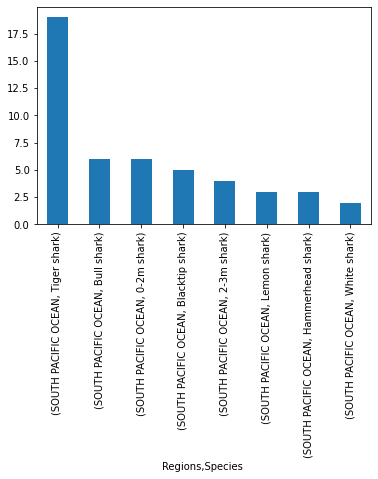

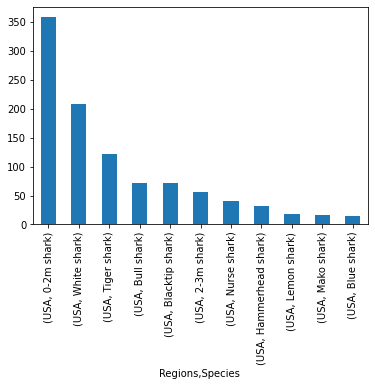

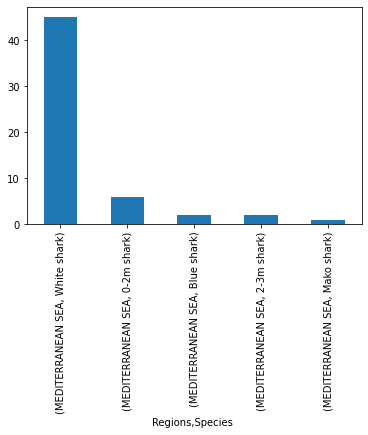

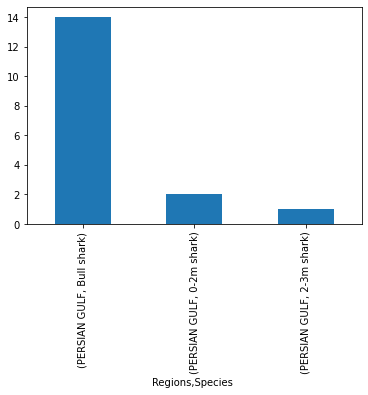

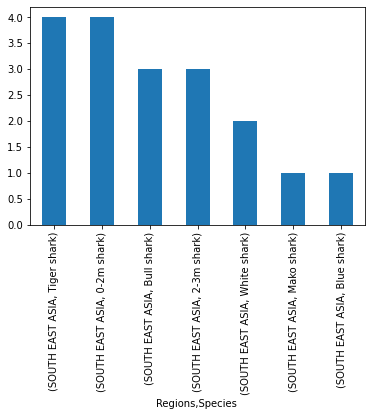

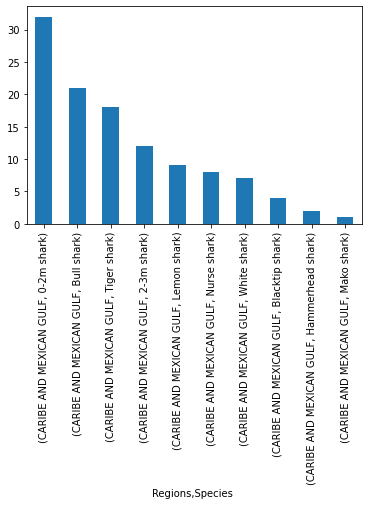

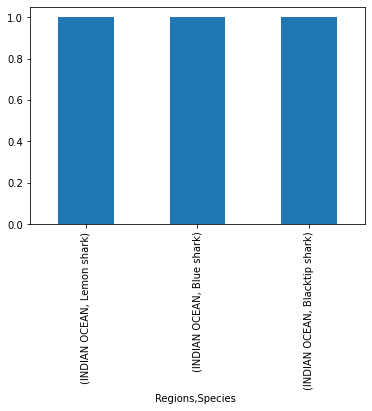

In [4]:
type_regions=list(set(attacks["Regions"]))
hayspecies = attacks["Species "] != "Not Available"

for i in range(len(type_regions)):
    reg = attacks.Regions == type_regions[i]
    row = hayspecies & reg
    table = attacks[row].groupby(["Regions","Species "])["Species "].count().sort_values(ascending = False)
    table.plot.bar()
    plt.show()

### 4. In which season of the year are there more shark attacks? (By region)
Let's find the month in which the recorded attacks happened:

In [5]:
attacks["Month"]=" "

for i in attacks.index:
    if re.match(r"(\d{4}).(\d{2}).(\d{2})", attacks["Date std."][i]):
        attacks["Month"][i] = re.match(r"(\d{4}).(\d{2}).(\d{2})", attacks["Date std."][i]).group()[5:7]
    else:
        attacks["Month"][i] = "Not Available"
        
    if attacks["Month"][i]== "00":
        attacks["Month"][i] = "Not Available"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


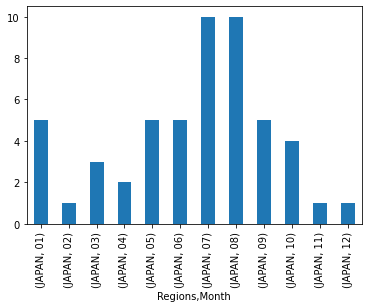

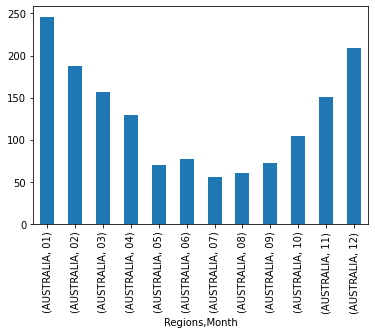

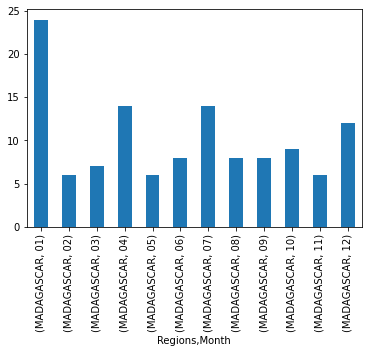

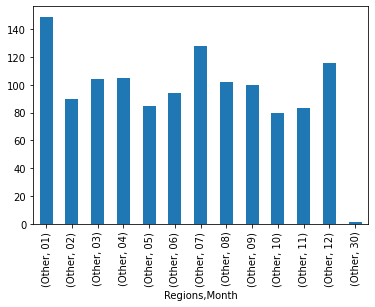

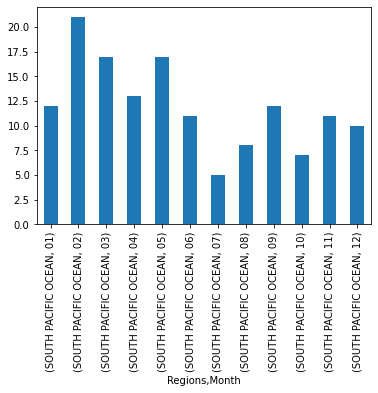

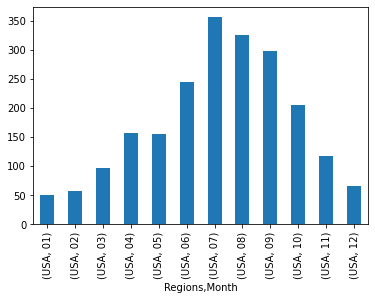

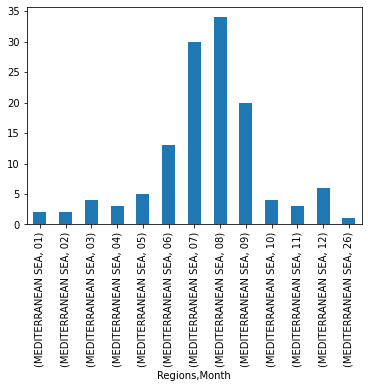

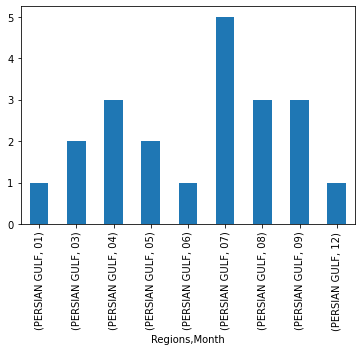

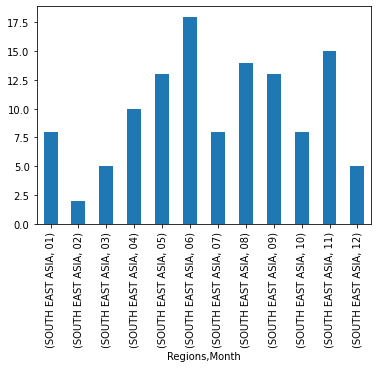

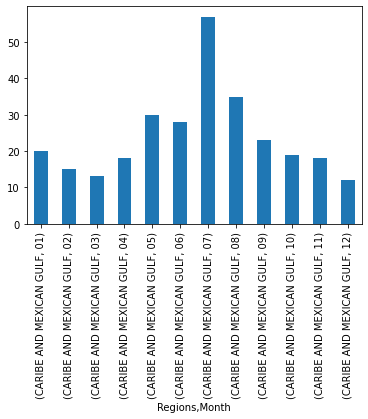

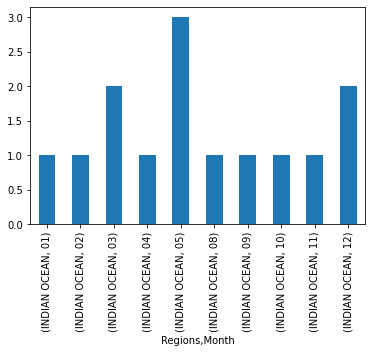

In [6]:
haymes = attacks["Month"] != "Not Available"

for i in range(len(type_regions)):
    reg = attacks.Regions == type_regions[i]
    row = haymes & reg
    table = attacks[row].groupby(["Regions","Month"])["Month"].count()
    table.plot.bar()
    plt.show()

### 5. Shark attack by species, time and region
Let's see which species is more common depending on the time of year in a given region.
#### 5.1. USA

In [7]:
region = attacks["Regions"] == "USA"
mm = attacks["Month"]!= "Not Available"

# To make a stack bar plot, all sharks must appear every month
shark = lambda x: attacks[region & mm & (attacks["Species "]== x)]["Month"].value_counts().sort_index()

s1 = shark("0-2m shark")
s2 = shark("White shark")
s3 = shark("Tiger shark") 
s4 = shark("Blacktip shark")

Text(0.5, 0, 'USA')

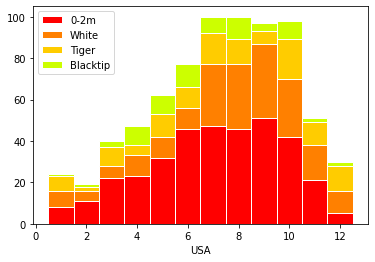

In [8]:
# The position of the bars on the x-axis
r = [1,2,3,4, 5, 6, 7, 8, 9, 10, 11,12]
bars3= np.add(s1, s2).tolist()
bars4= np.add(bars3, s3).tolist()

# Names of group and bar width
names = ["0-2m", "White", "Tiger", "Blacktip"]
barWidth = 1

plt.bar(r, s1, color='#ff0000', edgecolor='white', width=barWidth)
plt.bar(r, s2, bottom=s1, color='#ff8000', edgecolor='white', width=barWidth)
plt.bar(r, s3, bottom=bars3, color='#ffcc00', edgecolor='white', width=barWidth)
plt.bar(r, s4, bottom=bars4, color='#ccff00', edgecolor='white', width=barWidth)

# Custom X axis
plt.legend(names,loc=2)
plt.xlabel("USA")

The analysis of the shark attacks in USA leads us to the following conclusions:
* Some species, such as the 2-3m shark, Bull, Nurse, Hammerhead or Lemon sharks do not attack in USA from december to february.
* The time of greatest attacks is from july-october.
* 0-2m sharks are the ones that attack the most.

#### 5.2. AUSTRALIA

In [9]:
region = attacks["Regions"] == "AUSTRALIA"
mm = attacks["Month"]!= "Not Available"

# To make a stack bar plot, all sharks must appear every month
s1 = shark("White shark")
s2 = shark("0-2m shark")
s3 = shark("2-3m shark") 
s4 = shark("Bronze whaler shark")

Text(0.5, 0, 'AUSTRALIA')

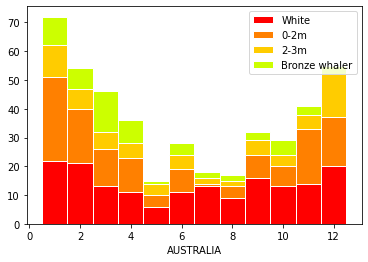

In [10]:
# The position of the bars on the x-axis
r = [1,2,3,4, 5, 6, 7, 8, 9, 10, 11,12]
bars3= np.add(s1, s2).tolist()
bars4= np.add(bars3, s3).tolist()

# Names of group and bar width
names = ["White", "0-2m", "2-3m", "Bronze whaler"]
barWidth = 1

plt.bar(r, s1, color='#ff0000', edgecolor='white', width=barWidth)
plt.bar(r, s2, bottom=s1, color='#ff8000', edgecolor='white', width=barWidth)
plt.bar(r, s3, bottom=bars3, color='#ffcc00', edgecolor='white', width=barWidth)
plt.bar(r, s4, bottom=bars4, color='#ccff00', edgecolor='white', width=barWidth)

# Custom X axis
plt.legend(names,loc=1)
plt.xlabel("AUSTRALIA")

The analysis of the shark attacks in AUSTRALIA leads us to the following conclusions:
* Some species, such as the Bull shark do not attack in AUSTRALIA from june to september.
* The time of greatest attacks is from december-february.
* White sharks are the ones that attack the most.

# Conclusions:
* USA is the studied region with more risk of a shark attack.
* The most common species worlwide is the white shark and 0-2m sharks.
* Attacks usually occur between January-December in the southern hemisphere, and June-August in the northern hemisphere, coinciding with summer.